In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import ensemble_model.preprocesser as preprocesser 
import ensemble_model.attention_model as attention_model 
from torch.utils.data import Dataset, DataLoader
from transformers import BertModel, BertTokenizer, RobertaModel, RobertaTokenizer
import whatthepatch
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve

/usr/local/lib/python3.11/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# df = pd.read_json(r'./datasets/patch_db.json', encoding='utf_8_sig')
# df.dropna(inplace=True)
# label2id={'non-security':0,'security':1}
# df = df.replace({"category": label2id})
# df

In [3]:

# df = pd.read_csv(r'/root/autodl-tmp/ensemble-commit/dataset/dataset.csv', index_col=0, encoding='utf_8_sig')
# df.fillna('', inplace=True)
# label2id={'negative':0,'positive':1}
# df = df.replace({"label": label2id})
# df



In [4]:
# def find_longest_list(lists):
#     # print(lists)
#     if not lists:
#         return None
#     try:
#         longest_list = max(lists, key=len)
#     except:
#         longest_list = None
#     return longest_list

In [5]:
# def extract_lines(changes):
#     try:
#        res = ''.join([x.line for x in changes])
#     except:
#        res = None
#     return res

In [6]:
# df['command'] = df['diff'].apply(lambda x : extract_lines(find_longest_list([y.changes for y in whatthepatch.parse_patch(x)])))
# extracted_cols = df['diff'].str.extract(r'^diff --git (?P<source>[^\t\n]+) (?P<target>[^\t\n]+)')
# whatthepatch.apply_diff(diff, lao)

In [7]:
# len(df_dataset)

In [8]:
# df_dataset[0]

In [9]:
# Load BERT and CodeBERT models and tokenizers
bert_model = BertModel.from_pretrained('./models/bert-base-cased')
bert_tokenizer = BertTokenizer.from_pretrained('./models/bert-base-cased')

codebert_model = RobertaModel.from_pretrained('./models/codebert-base')
codebert_tokenizer = RobertaTokenizer.from_pretrained('./models/codebert-base')

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [10]:
# train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)
# test_data, val_data = train_test_split(test_data, test_size=0.5, random_state=42)
train_data = pd.read_csv('./datasets/PD_train.csv')
test_data = pd.read_csv('./datasets/PD_test.csv')
val_data = pd.read_csv('./datasets/PD_val.csv')

train_data.reset_index(inplace=True)
test_data.reset_index(inplace=True)
val_data.reset_index(inplace=True)

In [11]:
train_data['category'].value_counts()

category
0    16575
1     8495
Name: count, dtype: int64

In [12]:


# Create Datasets and DataLoaders
train_dataset = preprocesser.SentencePairDataset(train_data, bert_tokenizer, codebert_tokenizer,message='commit_message',command='diff_code',label='category')
val_dataset = preprocesser.SentencePairDataset(val_data, bert_tokenizer, codebert_tokenizer,message='commit_message',command='diff_code',label='category')
test_dataset = preprocesser.SentencePairDataset(test_data, bert_tokenizer, codebert_tokenizer,message='commit_message',command='diff_code',label='category')

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)



# # Initialize the model
# model = em.CombinedModel(bert_model, codebert_model, bert_tokenizer, codebert_tokenizer)

# # Train the model
# model.trainer(train_loader, val_loader,num_epochs=10)
# for batch in train_loader:
#     print(batch)


base_model1 = attention_model.BaseModel(bert_model,bert_tokenizer)
base_model2 = attention_model.BaseModel(codebert_model,codebert_tokenizer)

# Create stacking model
atten_model = attention_model.AttentionModel(base_model1, base_model2)
# Train the model
atten_model.trainer(train_loader, val_loader,num_epochs=10, patience=3)

/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
  0%|          | 0/10 [00:00<?, ?it/s]

=============================train========================
Epoch 1/10, Loss: 0.5207877806301663
=============================eval========================


 10%|█         | 1/10 [10:57<1:38:34, 657.20s/it]

Validation Accuracy: 0.7893
Precision: 0.8394
Recall: 0.7893
F1-Score: 0.7529
Epoch 1/10, Validation Accuracy: 0.7893169551461009
当前best acc 0.7893169551461009
=============================train========================
Epoch 2/10, Loss: 0.5063229865027828
=============================eval========================


 20%|██        | 2/10 [21:45<1:26:53, 651.74s/it]

Validation Accuracy: 0.7893
Precision: 0.8394
Recall: 0.7893
F1-Score: 0.7529
Epoch 2/10, Validation Accuracy: 0.7893169551461009
比best acc差记一次 0
=============================train========================
Epoch 3/10, Loss: 0.3803473313166103
=============================eval========================


 30%|███       | 3/10 [32:33<1:15:50, 650.11s/it]

Validation Accuracy: 0.9125
Precision: 0.9122
Recall: 0.9125
F1-Score: 0.9123
Epoch 3/10, Validation Accuracy: 0.9125255909175507
当前best acc 0.9125255909175507
=============================train========================
Epoch 4/10, Loss: 0.24753714774764393
=============================eval========================


 40%|████      | 4/10 [43:20<1:04:54, 649.08s/it]

Validation Accuracy: 0.8961
Precision: 0.9019
Recall: 0.8961
F1-Score: 0.8976
Epoch 4/10, Validation Accuracy: 0.8961474036850922
比best acc差记一次 0
=============================train========================
Epoch 5/10, Loss: 0.19742681168304457
=============================eval========================


 50%|█████     | 5/10 [54:09<54:04, 648.82s/it]  

Validation Accuracy: 0.9306
Precision: 0.9305
Recall: 0.9306
F1-Score: 0.9298
Epoch 5/10, Validation Accuracy: 0.9305788200260562
当前best acc 0.9305788200260562
=============================train========================
Epoch 6/10, Loss: 0.1498671333943259
=============================eval========================


 60%|██████    | 6/10 [1:04:56<43:13, 648.46s/it]

Validation Accuracy: 0.9315
Precision: 0.9315
Recall: 0.9315
F1-Score: 0.9307
Epoch 6/10, Validation Accuracy: 0.9315093988460823
当前best acc 0.9315093988460823
=============================train========================
Epoch 7/10, Loss: 0.11718193858324942
=============================eval========================


 70%|███████   | 7/10 [1:15:46<32:26, 648.78s/it]

Validation Accuracy: 0.9300
Precision: 0.9299
Recall: 0.9300
F1-Score: 0.9292
Epoch 7/10, Validation Accuracy: 0.9300204727340405
比best acc差记一次 0
=============================train========================
Epoch 8/10, Loss: 0.09006878303667179
=============================eval========================


 80%|████████  | 8/10 [1:26:35<21:37, 648.88s/it]

Validation Accuracy: 0.9324
Precision: 0.9333
Recall: 0.9324
F1-Score: 0.9313
Epoch 8/10, Validation Accuracy: 0.9324399776661083
当前best acc 0.9324399776661083
=============================train========================
Epoch 9/10, Loss: 0.07210797901341398
=============================eval========================


 90%|█████████ | 9/10 [1:37:25<10:49, 649.26s/it]

Validation Accuracy: 0.9313
Precision: 0.9314
Recall: 0.9313
F1-Score: 0.9304
Epoch 9/10, Validation Accuracy: 0.931323283082077
比best acc差记一次 0
=============================train========================
Epoch 10/10, Loss: 0.05842170093913061
=============================eval========================


100%|██████████| 10/10 [1:48:14<00:00, 649.41s/it]

Validation Accuracy: 0.9326
Precision: 0.9323
Recall: 0.9326
F1-Score: 0.9321
Epoch 10/10, Validation Accuracy: 0.9326260934301135
当前best acc 0.9326260934301135


In [13]:
import torch

In [ ]:
test_dataset = preprocesser.SentencePairDataset(test_data, bert_tokenizer, codebert_tokenizer,message='commit_message',command='diff_code',label='category')
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

In [ ]:
test_acc, test_labels, test_probabilities, test_embeddings, test_predictions = atten_model.evaluate(test_loader)

Validation Accuracy: 0.9237
Precision: 0.9233
Recall: 0.9237
F1-Score: 0.9232


In [ ]:
res = test_data.copy()

In [ ]:
res['test_labels'] = test_labels
res['test_probabilities'] = test_probabilities
res['test_embeddings'] = test_embeddings
res['test_predictions'] = test_predictions

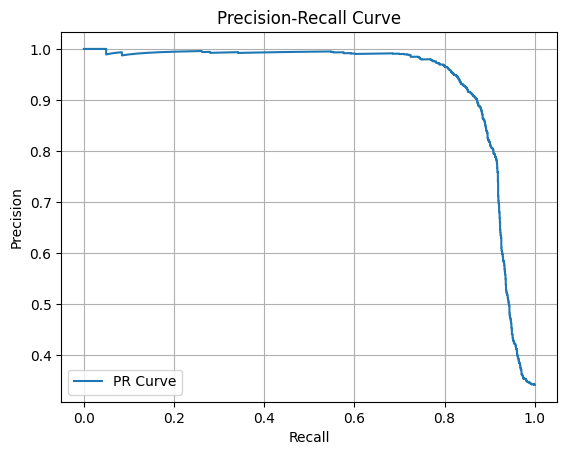

In [ ]:
# PR curve
atten_model.plot_pr_curve(test_labels, test_probabilities)
# Plot t-SNE for the best model

embedding来啦 (768,)


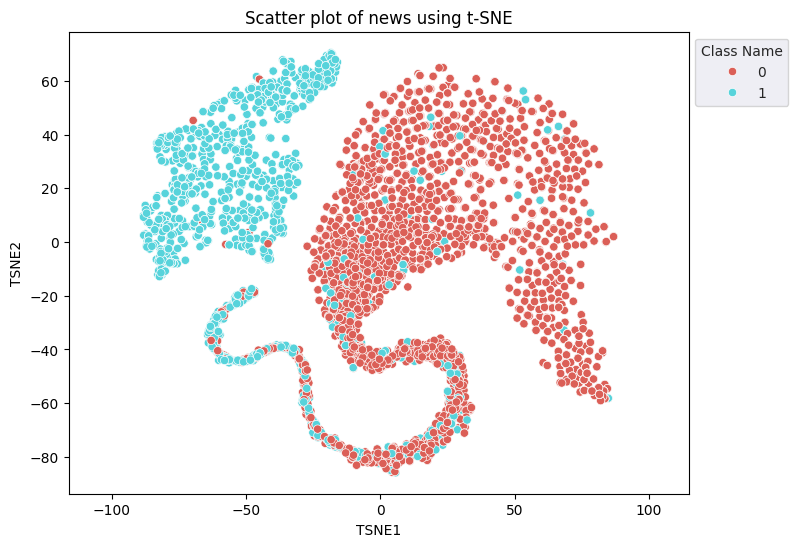

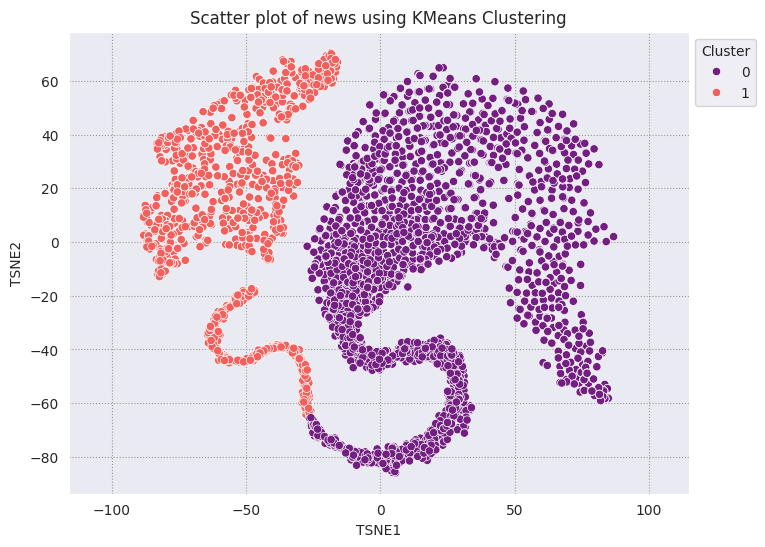

In [ ]:
# cluster to show the quality of embeddings
atten_model.plot_tsne(test_embeddings, test_labels)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix on Dataset I', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    # plt.xlabel('Predicted label')
    plt.tight_layout()

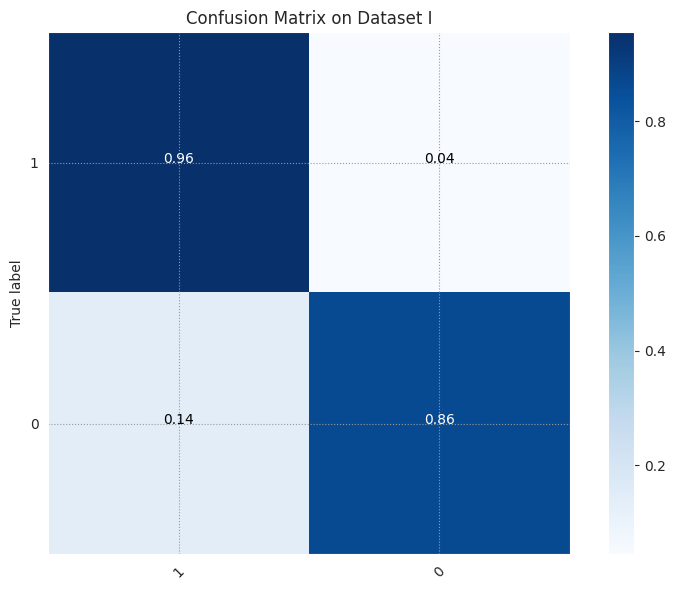

In [ ]:
cm = confusion_matrix(test_labels, test_predictions)

# Call the function to plot the confusion matrix
class_names = val_data['category'].unique()  # Replace with your class names
plot_confusion_matrix(cm, classes=class_names, normalize=True)  # Set normalize=False if you want counts instead of percentages
plt.savefig('Confusion Matrix on Dataset Patch_DB')

In [ ]:
res.to_csv('atten_model_res_PathcDB.csv')

In [ ]:
res_mis = test_data.copy()

In [ ]:
test_data

,index,Unnamed: 0,CVE_ID,CWE_ID,category,commit_id,commit_message,diff_code,owner,repo,source
0,0,27776,NaN,NaN,1,600a507ddcb99096731e1d96a3ebf43e20fc7f80,commit 600a507ddcb99096731e1d96a3ebf43e20fc7f8...,diff --git a/drivers/net/ethernet/intel/ixgbe/...,mjg59,linux,wild
1,1,25795,NaN,NaN,1,2a98dbbcd72cfae508c4d90bcbdc829363554ea7,commit 2a98dbbcd72cfae508c4d90bcbdc829363554ea...,diff --git a/drivers/usb/gadget/f_ecm.c b/driv...,torvalds,linux,wild
2,2,20663,NaN,NaN,0,33bf6102210bcbd39844514033898910c24824df,commit 33bf6102210bcbd39844514033898910c24824d...,diff --git a/sys/netinet/ip_ah.c b/sys/netinet...,openbsd,src,wild
3,3,16926,NaN,NaN,0,cc215898396ec6dccc900eed193c8ca6a2c77894,commit cc215898396ec6dccc900eed193c8ca6a2c7789...,diff --git a/sql/item_strfunc.cc b/sql/item_st...,mysql,mysql-server,wild
4,4,21645,NaN,NaN,0,3cdc0ed0cea50ea08dd146c1bbc82b1bcc2e1b80,commit 3cdc0ed0cea50ea08dd146c1bbc82b1bcc2e1b8...,diff --git a/mm/slab.c b/mm/slab.c\nindex 2e71...,stoth68000,media-tree,wild
...,...,...,...,...,...,...,...,...,...,...,...
5367,5367,28506,NaN,NaN,1,1708e2eb042f3511a2a02dbf7f6fbb22afe51e2d,commit 1708e2eb042f3511a2a02dbf7f6fbb22afe51e2...,diff --git a/ui/gtk/stats_tree_stat.c b/ui/gtk...,wireshark,wireshark,wild
5368,5368,32843,CVE-2013-4530,119,1,d8d0a0bc7e194300e53a346d25fe5724fd588387,From d8d0a0bc7e194300e53a346d25fe5724fd588387 ...,diff --git a/hw/ssi/pl022.c b/hw/ssi/pl022.c\n...,NaN,NaN,cve
5369,5369,16533,NaN,NaN,0,fb522f16ee93bf7be38ab7255cb11c68d3752ad2,commit fb522f16ee93bf7be38ab7255cb11c68d3752ad...,diff --git a/ext/oci8/oci8_interface.c b/ext/o...,php,php-src,wild
5370,5370,5157,NaN,NaN,0,1b74c25bc1a142ee8dd7ad080e2a974f28d1cb18,commit 1b74c25bc1a142ee8dd7ad080e2a974f28d1cb1...,diff --git a/fs/nfsd/nfs4state.c b/fs/nfsd/nfs...,stoth68000,media-tree,wild


In [ ]:
test_data

,index,Unnamed: 0,CVE_ID,CWE_ID,category,commit_id,commit_message,diff_code,owner,repo,source
0,0,27776,NaN,NaN,1,600a507ddcb99096731e1d96a3ebf43e20fc7f80,commit 600a507ddcb99096731e1d96a3ebf43e20fc7f8...,diff --git a/drivers/net/ethernet/intel/ixgbe/...,mjg59,linux,wild
1,1,25795,NaN,NaN,1,2a98dbbcd72cfae508c4d90bcbdc829363554ea7,commit 2a98dbbcd72cfae508c4d90bcbdc829363554ea...,diff --git a/drivers/usb/gadget/f_ecm.c b/driv...,torvalds,linux,wild
2,2,20663,NaN,NaN,0,33bf6102210bcbd39844514033898910c24824df,commit 33bf6102210bcbd39844514033898910c24824d...,diff --git a/sys/netinet/ip_ah.c b/sys/netinet...,openbsd,src,wild
3,3,16926,NaN,NaN,0,cc215898396ec6dccc900eed193c8ca6a2c77894,commit cc215898396ec6dccc900eed193c8ca6a2c7789...,diff --git a/sql/item_strfunc.cc b/sql/item_st...,mysql,mysql-server,wild
4,4,21645,NaN,NaN,0,3cdc0ed0cea50ea08dd146c1bbc82b1bcc2e1b80,commit 3cdc0ed0cea50ea08dd146c1bbc82b1bcc2e1b8...,diff --git a/mm/slab.c b/mm/slab.c\nindex 2e71...,stoth68000,media-tree,wild
...,...,...,...,...,...,...,...,...,...,...,...
5367,5367,28506,NaN,NaN,1,1708e2eb042f3511a2a02dbf7f6fbb22afe51e2d,commit 1708e2eb042f3511a2a02dbf7f6fbb22afe51e2...,diff --git a/ui/gtk/stats_tree_stat.c b/ui/gtk...,wireshark,wireshark,wild
5368,5368,32843,CVE-2013-4530,119,1,d8d0a0bc7e194300e53a346d25fe5724fd588387,From d8d0a0bc7e194300e53a346d25fe5724fd588387 ...,diff --git a/hw/ssi/pl022.c b/hw/ssi/pl022.c\n...,NaN,NaN,cve
5369,5369,16533,NaN,NaN,0,fb522f16ee93bf7be38ab7255cb11c68d3752ad2,commit fb522f16ee93bf7be38ab7255cb11c68d3752ad...,diff --git a/ext/oci8/oci8_interface.c b/ext/o...,php,php-src,wild
5370,5370,5157,NaN,NaN,0,1b74c25bc1a142ee8dd7ad080e2a974f28d1cb18,commit 1b74c25bc1a142ee8dd7ad080e2a974f28d1cb1...,diff --git a/fs/nfsd/nfs4state.c b/fs/nfsd/nfs...,stoth68000,media-tree,wild


In [ ]:
# 设置数据缺失的情况
# 设置随机种子以便结果可重复
import numpy as np
def data_missing(df):
    
    np.random.seed(42)
    
    # 定义缺失值的比例
    missing_rate = 0.2
    
    # 计算每列需要创建缺失值的数量
    num_missing = int(missing_rate * len(df))
    
    # 随机选择行进行缺失
    for col in ['commit_message', 'diff_code']:
        missing_indices = np.random.choice(df.index, num_missing, replace=False)
        
        # 选择每个单元格的部分字符来替换，而不是全部替换成NaN
        for idx in missing_indices:
            if np.random.rand() > 0.5:
                # 保留前半部分
                try:
                    # print(df.loc[idx, col][:len(df.loc[idx, col])//2] + '...')
                    df.loc[idx, col] = df.loc[idx, col][:len(df.loc[idx, col])//2] + '...'
                except:
                    continue
            else:
                # 保留后半部分
                try:
                    # print('...' + df.loc[idx, col][len(df.loc[idx, col])//2:])
                    df.loc[idx, col] = '...' + df.loc[idx, col][len(df.loc[idx, col])//2:]
                except:
                    continue
    
    return df
test_data_miss = data_missing(test_data)

In [ ]:
test_data_miss

,index,Unnamed: 0,CVE_ID,CWE_ID,category,commit_id,commit_message,diff_code,owner,repo,source
0,0,27776,NaN,NaN,1,600a507ddcb99096731e1d96a3ebf43e20fc7f80,commit 600a507ddcb99096731e1d96a3ebf43e20fc7f8...,diff --git a/drivers/net/ethernet/intel/ixgbe/...,mjg59,linux,wild
1,1,25795,NaN,NaN,1,2a98dbbcd72cfae508c4d90bcbdc829363554ea7,commit 2a98dbbcd72cfae508c4d90bcbdc829363554ea...,diff --git a/drivers/usb/gadget/f_ecm.c b/driv...,torvalds,linux,wild
2,2,20663,NaN,NaN,0,33bf6102210bcbd39844514033898910c24824df,commit 33bf6102210bcbd39844514033898910c24824d...,diff --git a/sys/netinet/ip_ah.c b/sys/netinet...,openbsd,src,wild
3,3,16926,NaN,NaN,0,cc215898396ec6dccc900eed193c8ca6a2c77894,commit cc215898396ec6dccc900eed193c8ca6a2c7789...,diff --git a/sql/item_strfunc.cc b/sql/item_st...,mysql,mysql-server,wild
4,4,21645,NaN,NaN,0,3cdc0ed0cea50ea08dd146c1bbc82b1bcc2e1b80,commit 3cdc0ed0cea50ea08dd146c1bbc82b1bcc2e1b8...,diff --git a/mm/slab.c b/mm/slab.c\nindex 2e71...,stoth68000,media-tree,wild
...,...,...,...,...,...,...,...,...,...,...,...
5367,5367,28506,NaN,NaN,1,1708e2eb042f3511a2a02dbf7f6fbb22afe51e2d,...ps://bugs.debian.org/cgi-bin/bugreport.cgi?...,diff --git a/ui/gtk/stats_tree_stat.c b/ui/gtk...,wireshark,wireshark,wild
5368,5368,32843,CVE-2013-4530,119,1,d8d0a0bc7e194300e53a346d25fe5724fd588387,From d8d0a0bc7e194300e53a346d25fe5724fd588387 ...,diff --git a/hw/ssi/pl022.c b/hw/ssi/pl022.c\n...,NaN,NaN,cve
5369,5369,16533,NaN,NaN,0,fb522f16ee93bf7be38ab7255cb11c68d3752ad2,commit fb522f16ee93bf7be38ab7255cb11c68d3752ad...,diff --git a/ext/oci8/oci8_interface.c b/ext/o...,php,php-src,wild
5370,5370,5157,NaN,NaN,0,1b74c25bc1a142ee8dd7ad080e2a974f28d1cb18,commit 1b74c25bc1a142ee8dd7ad080e2a974f28d1cb1...,diff --git a/fs/nfsd/nfs4state.c b/fs/nfsd/nfs...,stoth68000,media-tree,wild


In [ ]:
test_data_miss['commit_message']

0       commit 600a507ddcb99096731e1d96a3ebf43e20fc7f8...
1       commit 2a98dbbcd72cfae508c4d90bcbdc829363554ea...
2       commit 33bf6102210bcbd39844514033898910c24824d...
3       commit cc215898396ec6dccc900eed193c8ca6a2c7789...
4       commit 3cdc0ed0cea50ea08dd146c1bbc82b1bcc2e1b8...
                              ...                        
5367    ...ps://bugs.debian.org/cgi-bin/bugreport.cgi?...
5368    From d8d0a0bc7e194300e53a346d25fe5724fd588387 ...
5369    commit fb522f16ee93bf7be38ab7255cb11c68d3752ad...
5370    commit 1b74c25bc1a142ee8dd7ad080e2a974f28d1cb1...
5371    commit d16b4b3e485526b39e7bdc36bf2d8041080a720...
Name: commit_message, Length: 5372, dtype: object

In [ ]:
test_data_miss[test_data_miss['commit_message'].str.contains('...')]

,index,Unnamed: 0,CVE_ID,CWE_ID,category,commit_id,commit_message,diff_code,owner,repo,source
0,0,27776,NaN,NaN,1,600a507ddcb99096731e1d96a3ebf43e20fc7f80,commit 600a507ddcb99096731e1d96a3ebf43e20fc7f8...,diff --git a/drivers/net/ethernet/intel/ixgbe/...,mjg59,linux,wild
1,1,25795,NaN,NaN,1,2a98dbbcd72cfae508c4d90bcbdc829363554ea7,commit 2a98dbbcd72cfae508c4d90bcbdc829363554ea...,diff --git a/drivers/usb/gadget/f_ecm.c b/driv...,torvalds,linux,wild
2,2,20663,NaN,NaN,0,33bf6102210bcbd39844514033898910c24824df,commit 33bf6102210bcbd39844514033898910c24824d...,diff --git a/sys/netinet/ip_ah.c b/sys/netinet...,openbsd,src,wild
3,3,16926,NaN,NaN,0,cc215898396ec6dccc900eed193c8ca6a2c77894,commit cc215898396ec6dccc900eed193c8ca6a2c7789...,diff --git a/sql/item_strfunc.cc b/sql/item_st...,mysql,mysql-server,wild
4,4,21645,NaN,NaN,0,3cdc0ed0cea50ea08dd146c1bbc82b1bcc2e1b80,commit 3cdc0ed0cea50ea08dd146c1bbc82b1bcc2e1b8...,diff --git a/mm/slab.c b/mm/slab.c\nindex 2e71...,stoth68000,media-tree,wild
...,...,...,...,...,...,...,...,...,...,...,...
5367,5367,28506,NaN,NaN,1,1708e2eb042f3511a2a02dbf7f6fbb22afe51e2d,...ps://bugs.debian.org/cgi-bin/bugreport.cgi?...,diff --git a/ui/gtk/stats_tree_stat.c b/ui/gtk...,wireshark,wireshark,wild
5368,5368,32843,CVE-2013-4530,119,1,d8d0a0bc7e194300e53a346d25fe5724fd588387,From d8d0a0bc7e194300e53a346d25fe5724fd588387 ...,diff --git a/hw/ssi/pl022.c b/hw/ssi/pl022.c\n...,NaN,NaN,cve
5369,5369,16533,NaN,NaN,0,fb522f16ee93bf7be38ab7255cb11c68d3752ad2,commit fb522f16ee93bf7be38ab7255cb11c68d3752ad...,diff --git a/ext/oci8/oci8_interface.c b/ext/o...,php,php-src,wild
5370,5370,5157,NaN,NaN,0,1b74c25bc1a142ee8dd7ad080e2a974f28d1cb18,commit 1b74c25bc1a142ee8dd7ad080e2a974f28d1cb1...,diff --git a/fs/nfsd/nfs4state.c b/fs/nfsd/nfs...,stoth68000,media-tree,wild


In [ ]:
# test_data_miss.reset_index(inplace=True)
test_miss_dataset = preprocesser.SentencePairDataset(test_data_miss, bert_tokenizer, codebert_tokenizer,message='commit_message',command='diff_code',label='category')
test_miss_loader = DataLoader(test_miss_dataset, batch_size=8, shuffle=False)
test_miss_loader

In [ ]:
test_miss_acc, test_miss_labels, test_miss_probabilities, test_miss_embeddings, test_miss_predictions = atten_model.evaluate(test_miss_loader)

Validation Accuracy: 0.9084
Precision: 0.9084
Recall: 0.9084
F1-Score: 0.9071


In [ ]:
res_mis['test_miss_labels'] = test_miss_labels
res_mis['test_miss_probabilities'] = test_miss_probabilities
res_mis['test_miss_embeddings'] = test_miss_embeddings
res_mis['test_miss_predictions'] = test_miss_predictions

In [ ]:
res_mis.to_csv('atten_model_res_data_missing_PatchDB.csv')